<a href="https://colab.research.google.com/github/luiscsuarez/BigDataLuisS/blob/main/fraud_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto final de analisis de fraude**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data_fraud.csv to data_fraud.csv
User uploaded file "data_fraud.csv" with length 431827 bytes


In [3]:
!ls

data_fraud.csv	sample_data


In [4]:
!pwd

/content


In [5]:
data = pd.read_csv('/content/data_fraud.csv')

In [6]:
data.shape

(5000, 7)

In [7]:
data.head()

,Amount,sign_in_count,cantidad_tx,registro_agrega_tc,agrega_verifica_tc,verifica_compra_tc,Class
0,500.000,140,5,44.261533,0.014926,3.743494,1
1,132.680,151,7,116.298155,0.012734,0.096339,1
2,136.210,151,7,116.298155,0.012734,0.073461,1
3,4.406,151,7,0.219973,0.009449,0.367463,1
4,85.663,151,7,0.219973,0.009449,0.253070,1


In [8]:
# Print the shape of the data
#data = data.sample(frac=0.1, random_state = 48)
print(data.shape)
print(data.describe())

(5000, 7)
            Amount  sign_in_count  ...  verifica_compra_tc       Class
count  5000.000000    5000.000000  ...         5000.000000  5000.00000
mean    322.789765     701.965000  ...         1653.020626     0.75500
std     374.187653    1390.347265  ...         3600.467079     0.43013
min       1.000000       7.000000  ...            0.001715     0.00000
25%      56.500000      69.000000  ...            0.211135     1.00000
50%     220.980000     149.000000  ...            3.280587     1.00000
75%     500.000000     700.000000  ...          605.959789     1.00000
max    6999.999000   12974.000000  ...        18362.137309     1.00000

[8 rows x 7 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

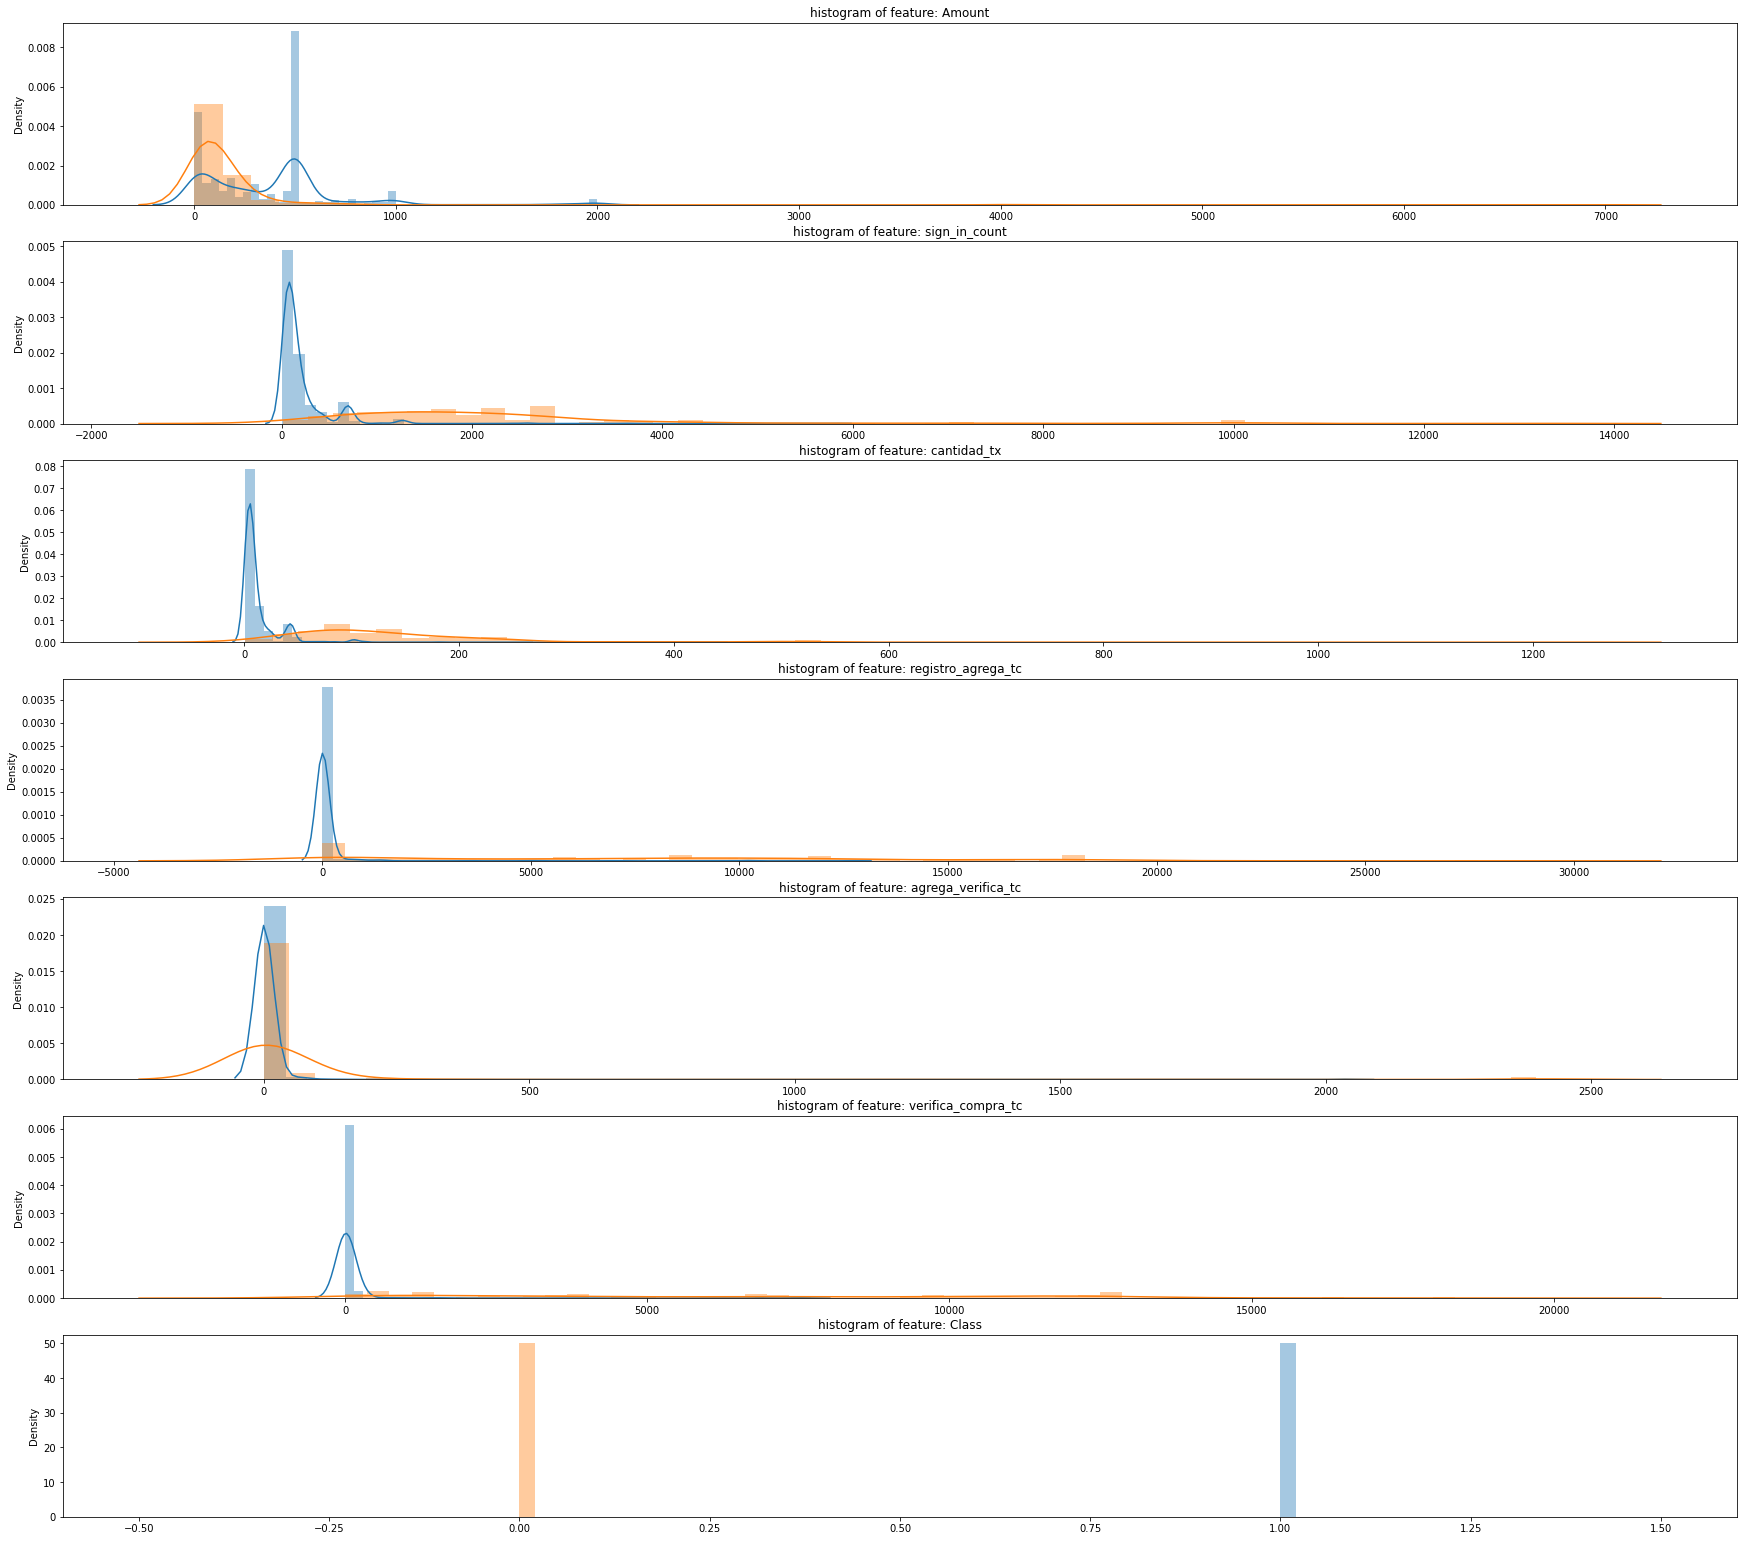

In [9]:
# distribution of anomalous features
features = data.iloc[:,0:7].columns
plt.figure(figsize=(30,30*4))
gs = gridspec.GridSpec(30, 1)
for i, c in enumerate(data[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(data[c][data.Class == 1], bins=50)
 sns.distplot(data[c][data.Class == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

In [13]:
# Determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

3.0816326530612246
Fraud Cases: 3775
Valid Transactions: 1225


In [15]:
print("Amount details of fraudulent transaction")
Fraud.Amount.describe()

Amount details of fraudulent transaction


count    3775.000000
mean      381.752756
std       352.925088
min         1.000000
25%        91.800000
50%       450.000000
75%       500.000000
max      2000.000000
Name: Amount, dtype: float64

In [16]:
print("details of valid transaction")
Valid.Amount.describe()

details of valid transaction


count    1225.000000
mean      141.087486
std       379.519223
min         1.000000
25%        37.519000
50%        75.990000
75%       153.559000
max      6999.999000
Name: Amount, dtype: float64

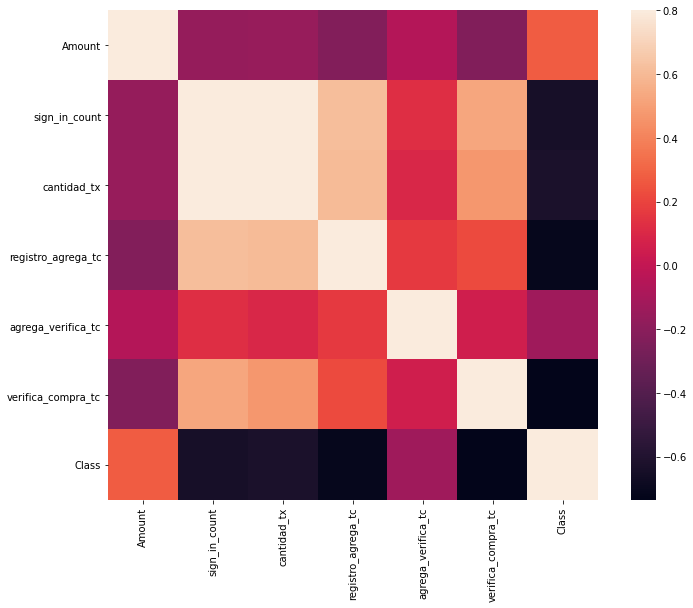

In [24]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [25]:
#dividing the X and the Y from the dataset
X=data.drop(['Class'], axis=1)
Y=data["Class"]
print(X.shape)
print(Y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(5000, 6)
(5000,)


In [26]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [45]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# predictions
y_pred = rfc.predict(X_test)

In [46]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.998
The precision is 0.9973753280839895
The recall is 1.0
The F1-Score is 0.9986859395532194
The Matthews correlation coefficient is0.9945169013227592


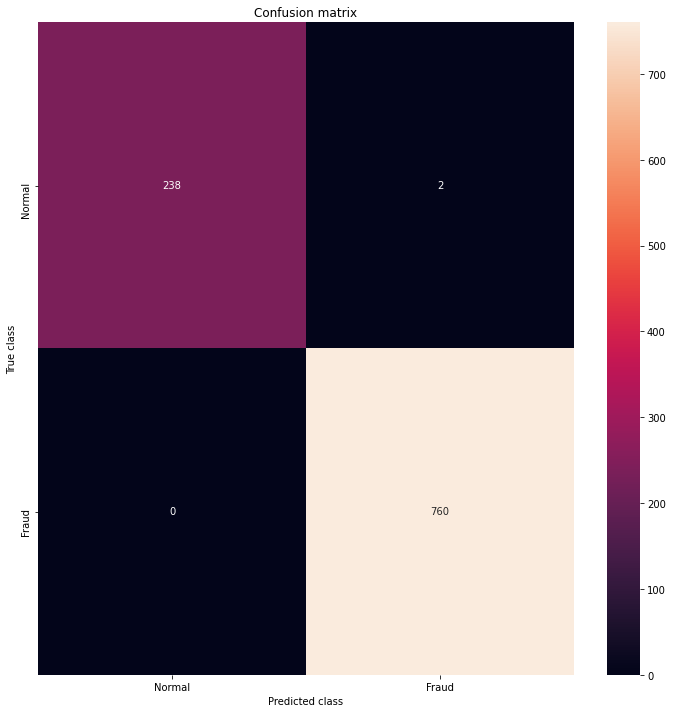

In [47]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

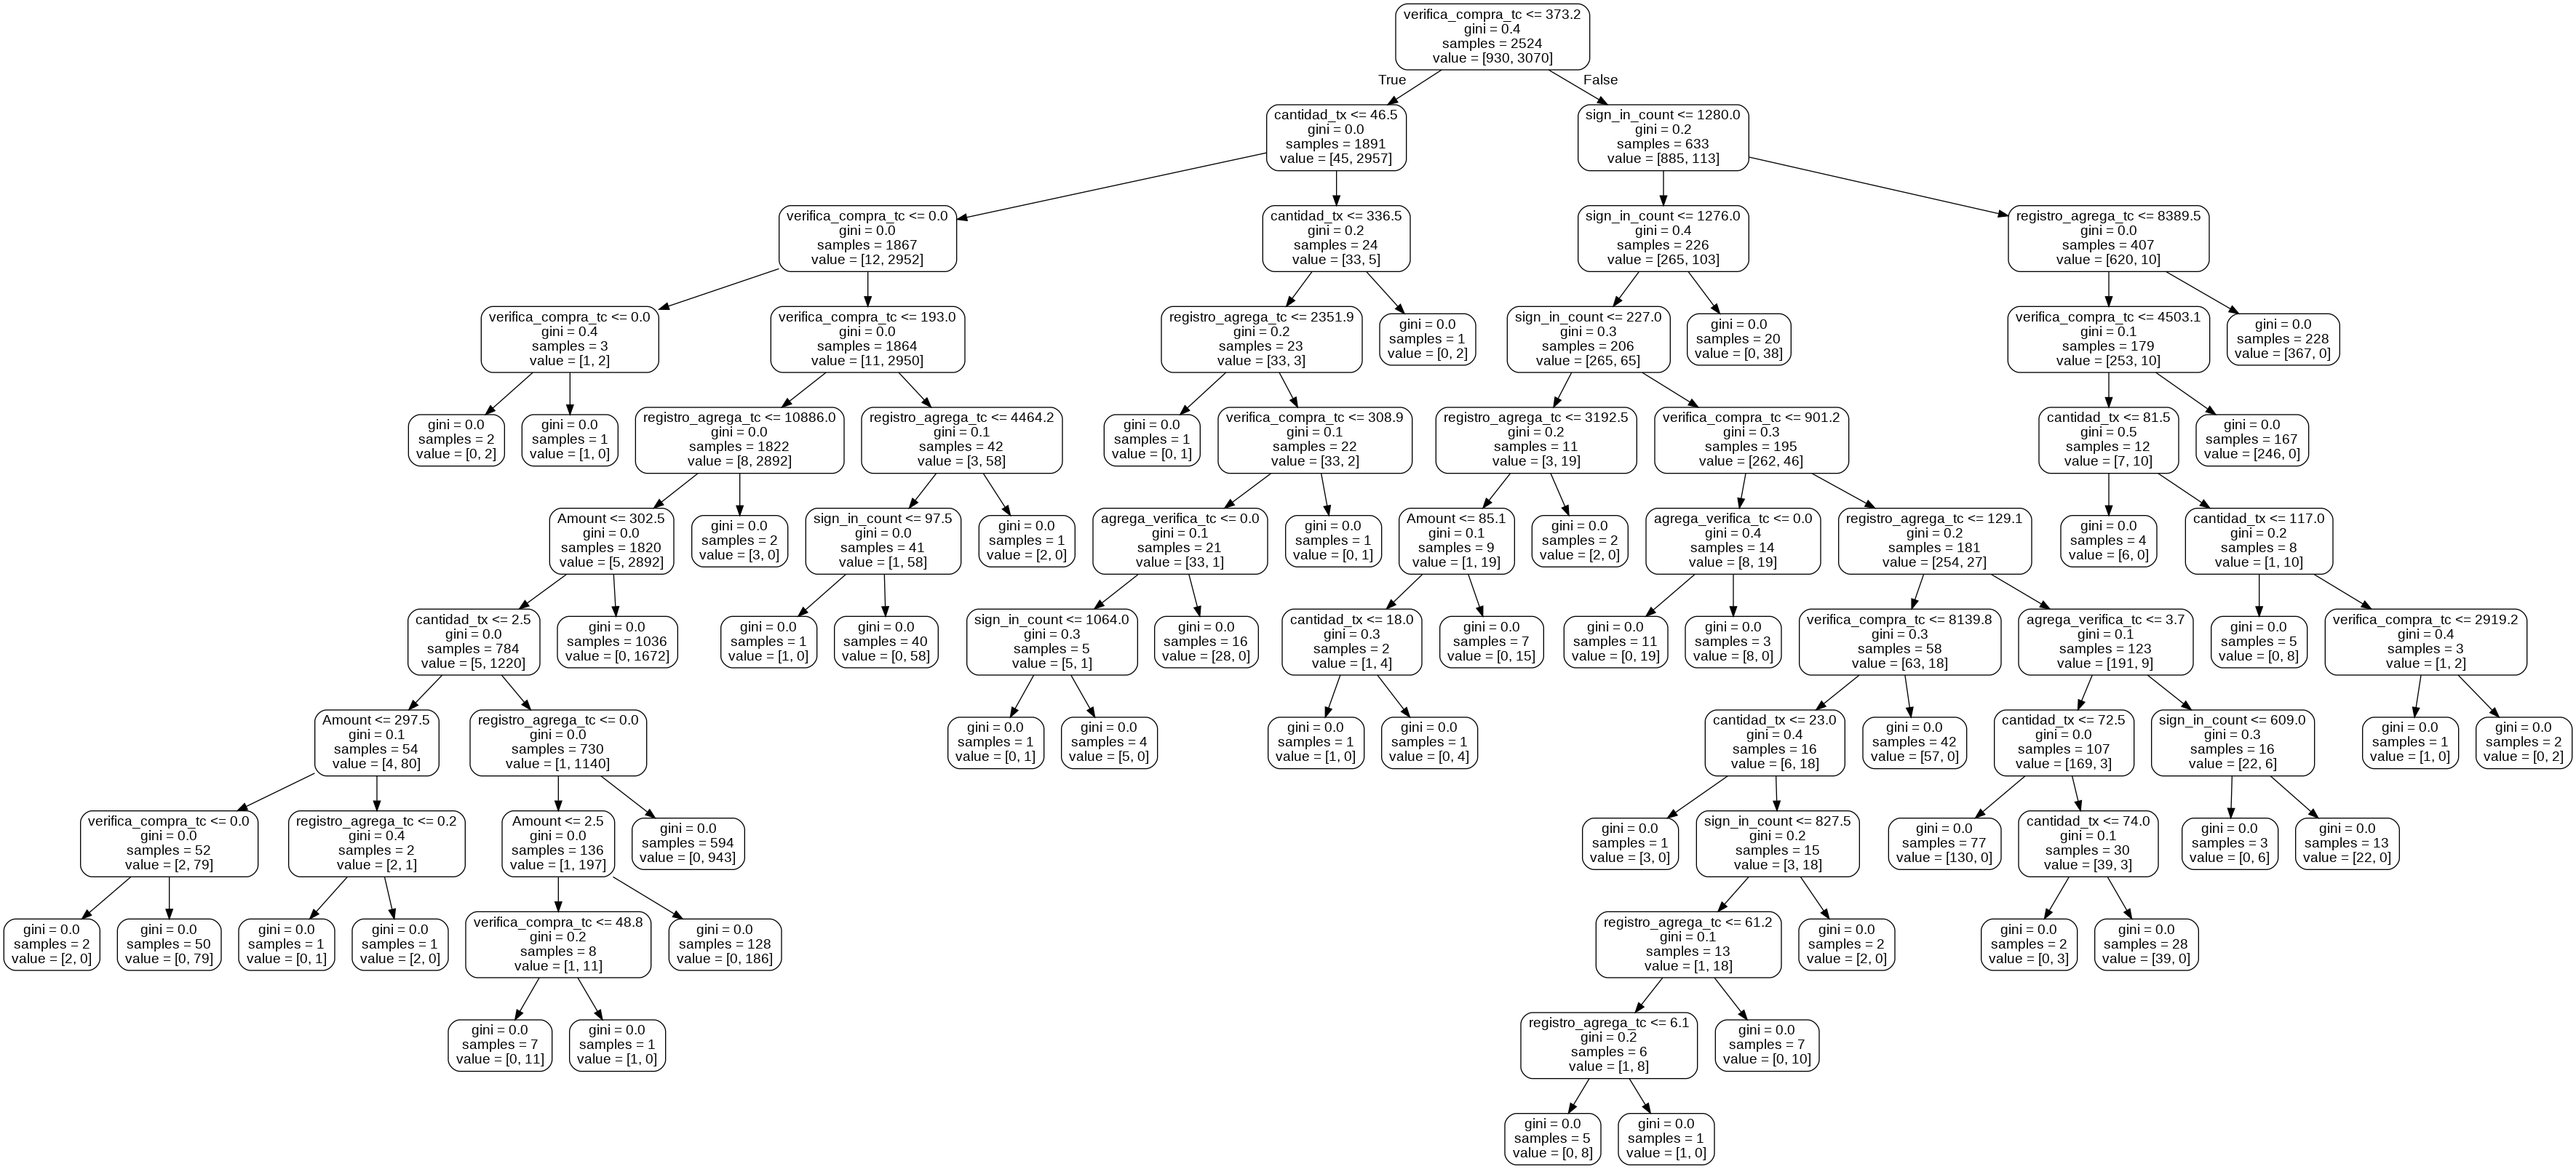

In [48]:
#visualizing the random tree 
feature_list = list(X.columns)
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))